In [4]:
from utils import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DEVICE:  cuda


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLE


<Axes: xlabel='Date', ylabel='Open'>

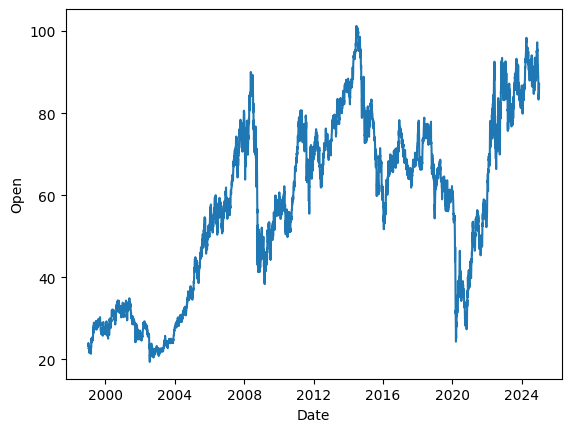

In [2]:
df_xle = get_cleaned_df('XLE','1990-01-01','2025-01-05')
sns.lineplot(df_xle,x="Date",y="Open")

[*********************100%***********************]  1 of 1 completed

read  6550  lines of data for ticker:  XLF


<Axes: xlabel='Date', ylabel='Open'>

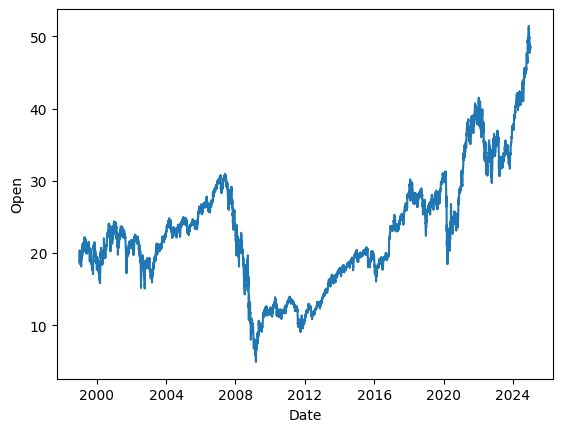

In [5]:
df_xlf = get_cleaned_df('XLF','1990-01-01','2025-01-05')
sns.lineplot(df_xlf,x="Date",y="Open")

[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLB


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLE


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLF


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLI


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLK


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLP


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLV


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLY


[*********************100%***********************]  1 of 1 completed


read  6550  lines of data for ticker:  XLU


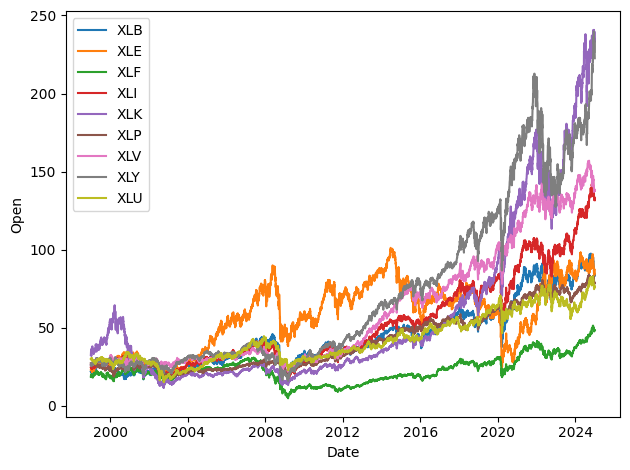

In [3]:
etfs = ['XLB','XLE','XLF','XLI','XLK','XLP','XLV','XLY','XLU']
for etf in etfs:
    df = get_cleaned_df(etf,'1990-01-01','2025-01-05')
    sns.lineplot(df,x="Date",y="Open",label=etf)
    plt.legend()
    plt.tight_layout()
    #plt.show()

In [4]:
kurts = []
dates = {'date_config0':['2001-01-01', '2020-01-01', '2022-01-02', '2024-01-05'],'date_config1':['1990-01-05', '2010-01-05', '2023-01-05', '2024-01-05'],'date_config2':['2000-01-05', "2024-01-05", "2024-01-05", "2025-01-05"],'date_config3':['2005-01-05', '2010-01-05', '2020-01-05', '2024-01-05']}
for etf in etfs:
    for date,_ in df_final.groupby("Date"):
        df = get_cleaned_df(etf,dates[date][0],dates[date][1])
        kurt = ((df["Close"]/df["Close"].shift(1))**2).kurt()
        kurts.append(kurt)
        

sns.barplot(x=etfs,y=kurts)
plt.title("Magnitude of # of outliers in sector price")
plt.show()

NameError: name 'df_final' is not defined

In [8]:
kurts = []
dfs = []
etfs = ['XLB','XLE','XLF','XLI','XLK','XLP','XLV','XLY','XLU']
for etf in etfs:
    df = get_cleaned_df(etf,'1990-01-01','2025-01-01')
    dfs.append(df)
    kurt = ((df["Close"]/df["Close"].shift(1))**2).kurt()
    kurts.append(kurt)




[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLB


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLE


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLF


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLI


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLK


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLP


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLV


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLY


[*********************100%***********************]  1 of 1 completed


read  6548  lines of data for ticker:  XLU


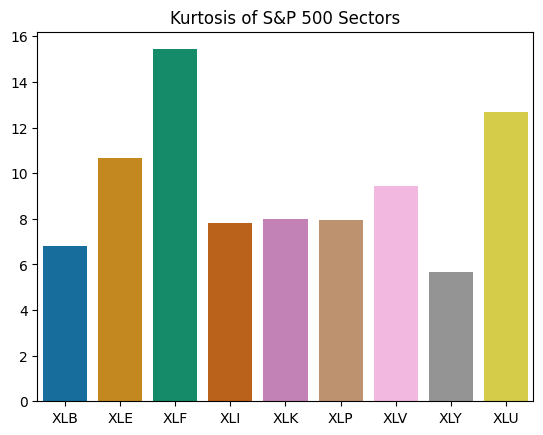

In [9]:
fig,ax = plt.subplots()
sns.color_palette('muted')

sns.barplot(x=etfs,y=kurts,ax=ax,palette='colorblind')
#customize_ax(ax)
plt.title("Kurtosis of S&P 500 Sectors")
plt.show()


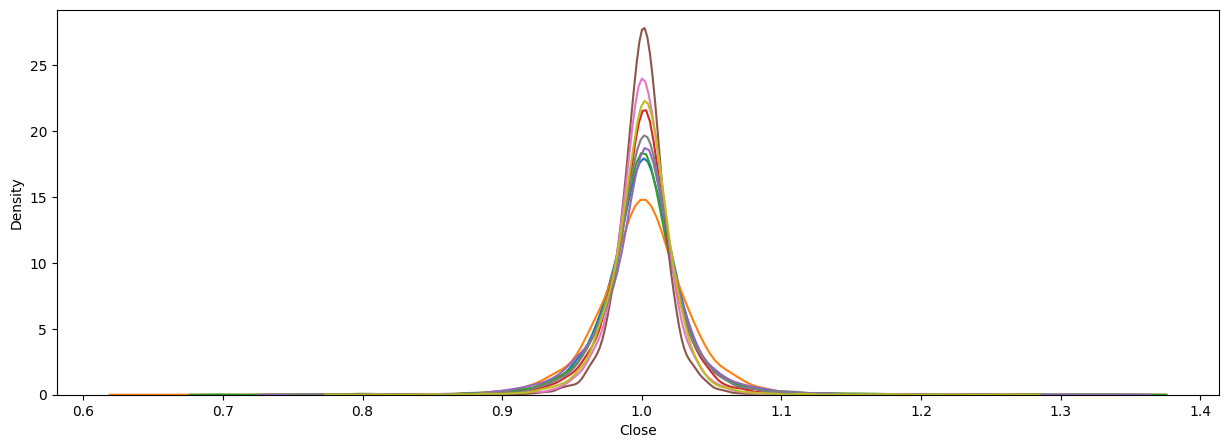

In [13]:
fig,ax = plt.subplots(figsize = (15,5))
for i,df in enumerate(dfs):
    sns.kdeplot((df["Close"]/df["Close"].shift(1))**2,label=etfs[i])

In [18]:
#make scatterplot analyzing kurtosis and return difference

df_final = pd.read_csv('../output/analysis/final_df.csv')
atrs = df_final.loc[df_final["Metric"]=="ATR"].groupby("ETF")["MAPE"].mean()
sds = df_final.loc[df_final["Metric"]=="SD_Squared_Returns"].groupby(["ETF","Date"])["MAPE"].mean()
diffs = atrs/sds
diffs_to_plot = np.array(diffs)

<Axes: >

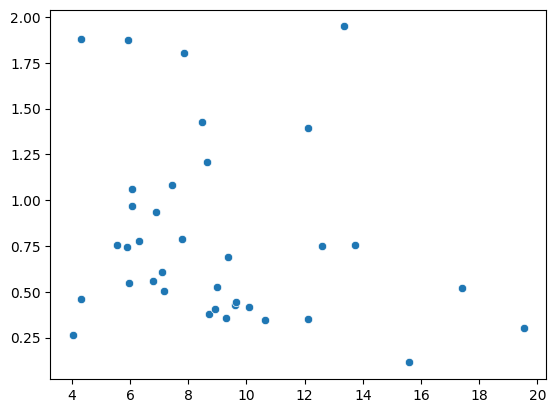

In [13]:
sns.scatterplot(x=kurts,y=diffs_to_plot)

In [14]:
import statsmodels.api as sm
X = sm.add_constant(kurts)
model = sm.OLS(diffs_to_plot,X,axis=1).fit()

/share/pkg.8/python3/3.12.4/install/lib/python3.12/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)


In [34]:
df_final_f = df_final.loc[df_final["Metric"] == "ATR"]
df_final_s = df_final.loc[df_final["Metric"] == "SD_Squared_Returns"]

In [43]:
df_final_f.iloc[np.argmin(df_final_f["MAPE"]-df_final_s["MAPE"])]

Unnamed: 0                     32
ETF                           XLU
Metric                        ATR
Final_Value            866.409105
Passive_Potential      972.176017
Relative_MSE             0.000868
MAPE                     0.114553
DM_stat                       NaN
DM_p                          NaN
Date                 date_config0
Model                         RNN
Name: 284, dtype: object

In [40]:
#get net accuracy diffs
df_final.groupby("Metric")["MAPE"].mean()

Metric
ATR                   0.311825
IQR                   0.496854
SD_Prices             0.350571
SD_Squared_Returns    0.439392
Name: MAPE, dtype: float64

In [45]:
#get net value diffs
df_final.groupby("Metric")["Final_Value"].mean()

Metric
ATR                   1015.544242
IQR                   1021.026168
SD_Prices             1001.622014
SD_Squared_Returns    1022.157272
Name: Final_Value, dtype: float64